# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
#reading data as dataframe
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [5]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


<AxesSubplot: >

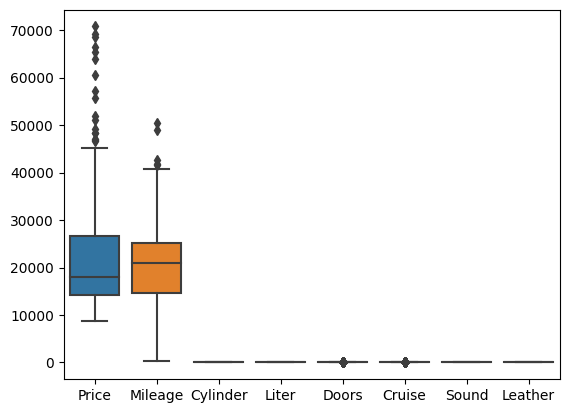

In [6]:
#visualizing data for outlier removal
import seaborn as sns
sns.boxplot(data=df)

In [7]:
#outlier removal with IQR method in mileage 
Q1=np.percentile(df["Mileage"],25)
Q3=np.percentile(df["Mileage"],75)
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR
print("min",min)
print("max",max)

min -1260.75
max 41097.25


In [8]:
elements_more_than_max=df["Mileage"]>=max
elements_less_than_min=df["Mileage"]<=min
#print(elements_more_than_max)
#print(elements_less_than_min)

In [9]:
indices_of_upper_outlier=np.where(elements_more_than_max)
print(indices_of_upper_outlier)
indices_of_lower_outlier=np.where(elements_less_than_min)
print(indices_of_lower_outlier)

(array([119, 159, 529, 649, 679], dtype=int64),)
(array([], dtype=int64),)


<AxesSubplot: >

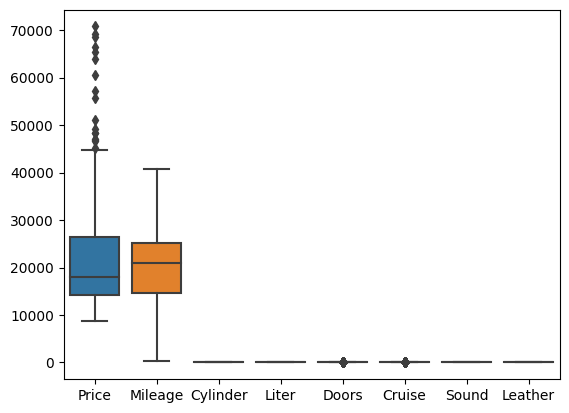

In [10]:
df.drop(indices_of_upper_outlier[0],inplace=True)
import seaborn as sns
sns.boxplot(data=df)
#removed outliers in Mileage columns

In [11]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [12]:
# Min Max Scaling for mileage column and liter column 
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
df[["Mileage","Liter"]]=MMS.fit_transform(df[["Mileage","Liter"]])
df.head()
df_dt=df.copy()   #taking copy for part3

In [13]:
#checking column values
print(df["Cylinder"].value_counts())
print(df["Doors"].value_counts())
df.info()

4    392
6    309
8     98
Name: Cylinder, dtype: int64
4    611
2    188
Name: Doors, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     799 non-null    float64
 1   Mileage   799 non-null    float64
 2   Make      799 non-null    object 
 3   Model     799 non-null    object 
 4   Trim      799 non-null    object 
 5   Type      799 non-null    object 
 6   Cylinder  799 non-null    int64  
 7   Liter     799 non-null    float64
 8   Doors     799 non-null    int64  
 9   Cruise    799 non-null    int64  
 10  Sound     799 non-null    int64  
 11  Leather   799 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 81.1+ KB


In [14]:
#Part 1 
X=df["Mileage"]
y=df["Price"]

In [15]:
print(X.shape)
print(y.shape)
X=X[:,np.newaxis]
print(X.shape)
X=pd.DataFrame(X)

(799,)
(799,)
(799, 1)


C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\3633885199.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=X[:,np.newaxis]


Part1 
let us take the equation
y=mx+c
price=w1*(Mileage)+w0

In [16]:
df["Price"].corr(df["Mileage"])
#-ve value so inversely proportion

-0.16593313428782708

In [17]:
df.corr()

C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.165933,0.567626,0.558134,-0.132153,0.431234,-0.129252,0.155033
Mileage,-0.165933,1.000000,-0.037775,-0.021933,-0.009303,0.014429,-0.030436,-0.011275
Cylinder,0.567626,-0.037775,1.000000,0.957882,0.003515,0.354907,-0.095215,0.074018
Liter,0.558134,-0.021933,0.957882,1.000000,-0.079470,0.378315,-0.069633,0.086697
Doors,-0.132153,-0.009303,0.003515,-0.079470,1.000000,-0.046554,-0.059822,-0.060832
Cruise,0.431234,0.014429,0.354907,0.378315,-0.046554,1.000000,-0.092987,-0.072952
Sound,-0.129252,-0.030436,-0.095215,-0.069633,-0.059822,-0.092987,1.000000,0.165051
Leather,0.155033,-0.011275,0.074018,0.086697,-0.060832,-0.072952,0.165051,1.000000


In [18]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.model_selection import train_test_split
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(639, 1)
(160, 1)
(639,)
(160,)


In [21]:
#model training 
LR.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=LR.predict(X_test)

(639, 1)
(160, 1)
(639,)
(160,)


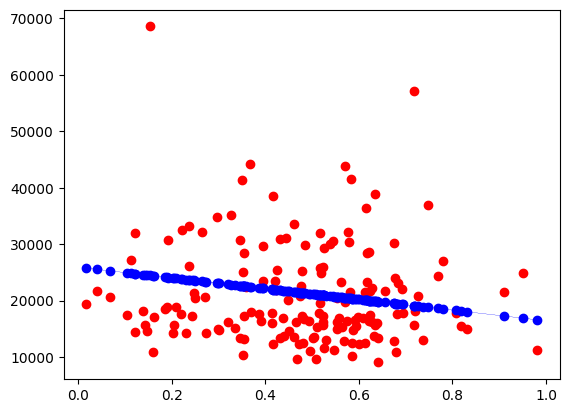

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# original data and the equation on the chart
plt.scatter(X_test,y_test,color="red")
plt.scatter(X_test,y_pred,color= "blue")
plt.plot(X_test,y_pred,color="blue",linewidth=0.1)

In [24]:
LR.intercept_       #w0

25913.545192045392

In [25]:
LR.coef_    #w1

array([-9492.16427201])

#so equation becomes 
            price=(-9492.16)*mileage+25913.545192045392
            y=w1*X+w0

In [26]:
LR.score(X_test,y_test)   #R2 score

-0.015247628242896383

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)    #R2 score
#Not a strong correlation <0.8

-0.015247628242896383

In [28]:
#Part2
df1=df.iloc[:,[0,1,6,7,8,9,10,11]]
df1

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,0.196648,6,0.340909,4,1,1,1
1,17542.036083,0.219242,6,0.340909,4,1,1,0
2,16218.847862,0.319630,6,0.340909,4,1,1,0
3,16336.913140,0.397399,6,0.340909,4,1,0,0
4,16339.170324,0.483672,6,0.340909,4,1,0,1
...,...,...,...,...,...,...,...,...
799,16507.070267,0.394606,6,0.318182,4,1,0,0
800,16175.957604,0.465454,6,0.318182,4,1,1,0
801,15731.132897,0.499790,6,0.318182,4,1,1,0
802,15118.893228,0.635627,6,0.318182,4,1,1,0


In [29]:
df1.isnull().sum()

Price       0
Mileage     0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [30]:
#applying ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
#print(df1["Cylinder"].isnull().sum())
x_OE=OE.fit_transform(df1[["Cylinder"]])
#print(np.isnan(x_OE).sum())
df_sample=x_OE.tolist()
df1["Cylinder"]=pd.DataFrame(df_sample)
#print(df1["Cylinder"].isnull().sum())
df1=df1.dropna()

C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\3363331344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Cylinder"]=pd.DataFrame(df_sample)


In [31]:
df1["Cylinder"].isnull().sum()
#df1.head()

0

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 0 to 798
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     794 non-null    float64
 1   Mileage   794 non-null    float64
 2   Cylinder  794 non-null    float64
 3   Liter     794 non-null    float64
 4   Doors     794 non-null    int64  
 5   Cruise    794 non-null    int64  
 6   Sound     794 non-null    int64  
 7   Leather   794 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [33]:
df1["Cylinder"].value_counts()

0.0    389
1.0    308
2.0     97
Name: Cylinder, dtype: int64

In [34]:
df1["Doors"].value_counts()

4    606
2    188
Name: Doors, dtype: int64

In [35]:
#applying one hot encoding by dropping dummies
df1[["2_Doors","4_Doors"]]=pd.get_dummies(df1["Doors"]) # droping 2 door since any one will be present

C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\335434817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["2_Doors","4_Doors"]]=pd.get_dummies(df1["Doors"]) # droping 2 door since any one will be present
C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\335434817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["2_Doors","4_Doors"]]=pd.get_dummies(df1["Doors"]) # droping 2 door since any one will be present


In [36]:
df1

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,2_Doors,4_Doors
0,17314.103129,0.196648,1.0,0.340909,4,1,1,1,0,1
1,17542.036083,0.219242,1.0,0.340909,4,1,1,0,0,1
2,16218.847862,0.319630,1.0,0.340909,4,1,1,0,0,1
3,16336.913140,0.397399,1.0,0.340909,4,1,0,0,0,1
4,16339.170324,0.483672,1.0,0.340909,4,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
794,18173.978084,0.137443,1.0,0.318182,4,1,1,1,0,1
795,18490.983029,0.185128,1.0,0.318182,4,1,1,1,0,1
796,17322.078404,0.243146,1.0,0.318182,4,1,0,1,0,1
797,17978.356998,0.264999,1.0,0.318182,4,1,0,0,0,1


In [37]:
X_1=df1.iloc[:,1:]
y_1=df1.iloc[:,0]

In [38]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1,y_1,test_size=0.2,random_state=0)
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)
#model training 
reg.fit(X_train_1,y_train_1)
y_pred_1=reg.predict(X_test_1)

(635, 9)
(159, 9)
(635,)
(159,)


In [39]:
reg.intercept_       #w0

17506.646303951693

In [40]:
reg.coef_    #w1

array([-7873.19439034,  3572.06076442,  8437.03837315,  -751.49496879,
        5925.61505958, -2091.06651725,  3384.9699532 ,   375.74748439,
        -375.74748439])

In [41]:
names=list(X_train_1.columns)
values=list(reg.coef_)
output_str=""
for i in range(len(names)):
    if str(values[i])[0]!="-":
        output_str=output_str+"+"+str(values[i])+"*"+str(names[i])
    output_str=output_str+str(values[i])+"*"+str(names[i])
print("equation is",output_str+str(reg.intercept_))

equation is -7873.194390342718*Mileage+3572.0607644161564*Cylinder3572.0607644161564*Cylinder+8437.038373154526*Liter8437.038373154526*Liter-751.4949687887529*Doors+5925.61505957612*Cruise5925.61505957612*Cruise-2091.0665172529193*Sound+3384.969953200749*Leather3384.969953200749*Leather+375.7474843943828*2_Doors375.7474843943828*2_Doors-375.7474843943787*4_Doors17506.646303951693


In [42]:
reg.score(X_test_1,y_test_1)   #R2 score

0.37611011922825066

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test_1,y_pred_1)    #R2 score
#Not a strong correlation <0.8

0.37611011922825066

In [44]:
# Part 3 reading data as dataframe
#df_dt = pd.read_csv("car_data.csv")
#df_dt.shape
#df_dt=df_dt.iloc[:,[0,1,6,7,8,9,10,11]]
df_dt

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,0.196648,Buick,Century,Sedan 4D,Sedan,6,0.340909,4,1,1,1
1,17542.036083,0.219242,Buick,Century,Sedan 4D,Sedan,6,0.340909,4,1,1,0
2,16218.847862,0.319630,Buick,Century,Sedan 4D,Sedan,6,0.340909,4,1,1,0
3,16336.913140,0.397399,Buick,Century,Sedan 4D,Sedan,6,0.340909,4,1,0,0
4,16339.170324,0.483672,Buick,Century,Sedan 4D,Sedan,6,0.340909,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0.394606,Saturn,L Series,L300 Sedan 4D,Sedan,6,0.318182,4,1,0,0
800,16175.957604,0.465454,Saturn,L Series,L300 Sedan 4D,Sedan,6,0.318182,4,1,1,0
801,15731.132897,0.499790,Saturn,L Series,L300 Sedan 4D,Sedan,6,0.318182,4,1,1,0
802,15118.893228,0.635627,Saturn,L Series,L300 Sedan 4D,Sedan,6,0.318182,4,1,1,0


In [45]:
#applying ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
#print(df1["Cylinder"].isnull().sum())
x_OE=OE.fit_transform(df_dt[["Cylinder"]])
#print(np.isnan(x_OE).sum())
df_sample=x_OE.tolist()
df_dt["Cylinder"]=pd.DataFrame(df_sample)
#print(df1["Cylinder"].isnull().sum())
df_dt=df_dt.dropna()
#applying one hot encoding by dropping dummies
df_dt[["2_Doors","4_Doors"]]=pd.get_dummies(df_dt["Doors"]) # droping 2 door since any one will be present
df_dt

C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\3885535096.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt[["2_Doors","4_Doors"]]=pd.get_dummies(df_dt["Doors"]) # droping 2 door since any one will be present
C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\3885535096.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt[["2_Doors","4_Doors"]]=pd.get_dummies(df_dt["Doors"]) # droping 2 door since any one will be present


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,2_Doors,4_Doors
0,17314.103129,0.196648,Buick,Century,Sedan 4D,Sedan,1.0,0.340909,4,1,1,1,0,1
1,17542.036083,0.219242,Buick,Century,Sedan 4D,Sedan,1.0,0.340909,4,1,1,0,0,1
2,16218.847862,0.319630,Buick,Century,Sedan 4D,Sedan,1.0,0.340909,4,1,1,0,0,1
3,16336.913140,0.397399,Buick,Century,Sedan 4D,Sedan,1.0,0.340909,4,1,0,0,0,1
4,16339.170324,0.483672,Buick,Century,Sedan 4D,Sedan,1.0,0.340909,4,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,18173.978084,0.137443,Saturn,L Series,L300 Sedan 4D,Sedan,1.0,0.318182,4,1,1,1,0,1
795,18490.983029,0.185128,Saturn,L Series,L300 Sedan 4D,Sedan,1.0,0.318182,4,1,1,1,0,1
796,17322.078404,0.243146,Saturn,L Series,L300 Sedan 4D,Sedan,1.0,0.318182,4,1,0,1,0,1
797,17978.356998,0.264999,Saturn,L Series,L300 Sedan 4D,Sedan,1.0,0.318182,4,1,0,0,0,1


In [46]:
print(df_dt["Make"].unique())
print(df_dt["Model"].unique())
print(df_dt["Trim"].unique())
print(df_dt["Type"].unique())
#Applying one hot encoding
df_dt[df_dt["Make"].unique()]=pd.get_dummies(df_dt["Make"])
df_dt[df_dt["Model"].unique()]=pd.get_dummies(df_dt["Model"])
df_dt[df_dt["Trim"].unique()]=pd.get_dummies(df_dt["Trim"])
df_dt[df_dt["Type"].unique()]=pd.get_dummies(df_dt["Type"])
df_dt
df_dt=df_dt.drop(columns=["Make","Model","Trim","Type"])
df_dt

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']
['Sedan 4D' 'CX Sedan 4D' 'CXL Sedan 4D' 'CXS Sedan 4D' 'Custom Sedan 4D'
 'Limited Sedan 4D' 'Special Ed Ultra 4D' 'DHS Sedan 4D' 'DTS Sedan 4D'
 'Hardtop Conv 2D' 'LS Hatchback 4D' 'LS Sedan 4D' 'LT Hatchback 4D'
 'LT Sedan 4D' 'SVM Hatchback 4D' 'SVM Sedan 4D' 'Coupe 2D' 'LS Coupe 2D'
 'LS Sport Coupe 2D' 'LS Sport Sedan 4D' 'Conv 2D' 'SS Sedan 4D'
 'LS MAXX Hback 4D' 'LT MAXX Hback 4D' 'MAXX Hback 4D' 'LT Coupe 2D'
 'SS Coupe 2D' 'GXP Sedan 4D' 'SE Sedan 4D' 'SLE Sedan 4D' 'GT Sedan 4D'
 'GT Coupe 2D' 'GTP Sedan 4D' 'AWD Sportwagon 4D' 'GT Sportwagon'
 'Sportwagon 4D' 'Linear Conv 2D' 'Linear Sedan 4D' 'Aero Conv 2D'
 'Aero 

C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\96245735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt[df_dt["Make"].unique()]=pd.get_dummies(df_dt["Make"])
C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\96245735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt[df_dt["Make"].unique()]=pd.get_dummies(df_dt["Make"])
C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_1940\96245735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,2_Doors,4_Doors,...,Arc Wagon 4D,Linear Wagon 4D,Aero Wagon 4D,Quad Coupe 2D,L300 Sedan 4D,Sedan,Convertible,Hatchback,Coupe,Wagon
0,17314.103129,0.196648,1.0,0.340909,4,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,0.219242,1.0,0.340909,4,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,0.319630,1.0,0.340909,4,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,0.397399,1.0,0.340909,4,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,0.483672,1.0,0.340909,4,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,18173.978084,0.137443,1.0,0.318182,4,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
795,18490.983029,0.185128,1.0,0.318182,4,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
796,17322.078404,0.243146,1.0,0.318182,4,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
797,17978.356998,0.264999,1.0,0.318182,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [47]:
df_dt.head()
df_dt=df_dt.dropna()
X=df_dt.iloc[:,1:]
y=df_dt.iloc[:,0]


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(635, 99)
(159, 99)
(635,)
(159,)


In [50]:
X_train=X_train.drop("Doors",axis=1)

In [51]:
X_train

,Mileage,Cylinder,Liter,Cruise,Sound,Leather,2_Doors,4_Doors,Buick,Cadillac,...,Arc Wagon 4D,Linear Wagon 4D,Aero Wagon 4D,Quad Coupe 2D,L300 Sedan 4D,Sedan,Convertible,Hatchback,Coupe,Wagon
64,0.499024,1.0,0.500000,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
634,0.510691,0.0,0.090909,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
52,0.476998,1.0,0.500000,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
651,0.423084,0.0,0.090909,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
551,0.456184,1.0,0.500000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0.311769,0.0,0.136364,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
194,0.512867,0.0,0.000000,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
632,0.431241,0.0,0.090909,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
562,0.309149,1.0,0.500000,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
#to try encode cylinder door
#scaling mileage,liter outlier, 
print(df_dt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 0 to 798
Data columns (total 100 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                794 non-null    float64
 1   Mileage              794 non-null    float64
 2   Cylinder             794 non-null    float64
 3   Liter                794 non-null    float64
 4   Doors                794 non-null    int64  
 5   Cruise               794 non-null    int64  
 6   Sound                794 non-null    int64  
 7   Leather              794 non-null    int64  
 8   2_Doors              794 non-null    uint8  
 9   4_Doors              794 non-null    uint8  
 10  Buick                794 non-null    uint8  
 11  Cadillac             794 non-null    uint8  
 12  Chevrolet            794 non-null    uint8  
 13  Pontiac              794 non-null    uint8  
 14  SAAB                 794 non-null    uint8  
 15  Saturn               794 non-null    ui

In [53]:
#part3
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(max_depth=6,random_state=0)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)

0.972480089683502

In [54]:
print(X_train.shape)

(635, 98)


In [55]:
X_test=X_test.drop("Doors",axis=1)

In [56]:
dtc.score(X_test,y_test)

0.9614219149691967

In [57]:
y_pred=dtc.predict(X_test)

In [58]:
list(dtc.feature_importances_)  #based on values in ascending order the feature is importance 

[0.022590687951535817,
 0.000195778267941786,
 0.5802930540935496,
 0.0,
 0.0,
 0.0,
 0.00796131206150304,
 0.0,
 0.0,
 0.06416381906609608,
 3.339201047627407e-05,
 0.03276642298462778,
 0.1877044887884256,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001421296984342525,
 0.0,
 0.005563276349694706,
 0.003330930896636088,
 0.005405115072557078,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006374835519032361,
 0.0,
 0.0,
 0.0,
 0.0008028208112584608,
 0.0,
 0.0,
 0.000387454642985838,
 0.0,
 0.0,
 0.0002656675887903226,
 0.0006123781211620236,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07978487802834976,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.17747314796537e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00025061602955506396,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [59]:
list(X_train.columns)

['Mileage',
 'Cylinder',
 'Liter',
 'Cruise',
 'Sound',
 'Leather',
 '2_Doors',
 '4_Doors',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Pontiac',
 'SAAB',
 'Saturn',
 'Century',
 'Lacrosse',
 'Lesabre',
 'Park Avenue',
 'CST-V',
 'CTS',
 'Deville',
 'STS-V6',
 'STS-V8',
 'XLR-V8',
 'AVEO',
 'Cavalier',
 'Classic',
 'Cobalt',
 'Corvette',
 'Impala',
 'Malibu',
 'Monte Carlo',
 'Bonneville',
 'G6',
 'Grand Am',
 'Grand Prix',
 'GTO',
 'Sunfire',
 'Vibe',
 '9_3',
 '9_3 HO',
 '9_5',
 '9_5 HO',
 '9-2X AWD',
 'Ion',
 'L Series',
 'Sedan 4D',
 'CX Sedan 4D',
 'CXL Sedan 4D',
 'CXS Sedan 4D',
 'Custom Sedan 4D',
 'Limited Sedan 4D',
 'Special Ed Ultra 4D',
 'DHS Sedan 4D',
 'DTS Sedan 4D',
 'Hardtop Conv 2D',
 'LS Hatchback 4D',
 'LS Sedan 4D',
 'LT Hatchback 4D',
 'LT Sedan 4D',
 'SVM Hatchback 4D',
 'SVM Sedan 4D',
 'Coupe 2D',
 'LS Coupe 2D',
 'LS Sport Coupe 2D',
 'LS Sport Sedan 4D',
 'Conv 2D',
 'SS Sedan 4D',
 'LS MAXX Hback 4D',
 'LT MAXX Hback 4D',
 'MAXX Hback 4D',
 'LT Coupe 2D',
 'SS Co

In [60]:
d1=dict(zip(list(X_train.columns),list(dtc.feature_importances_)))
d1

{'Mileage': 0.022590687951535817,
 'Cylinder': 0.000195778267941786,
 'Liter': 0.5802930540935496,
 'Cruise': 0.0,
 'Sound': 0.0,
 'Leather': 0.0,
 '2_Doors': 0.00796131206150304,
 '4_Doors': 0.0,
 'Buick': 0.0,
 'Cadillac': 0.06416381906609608,
 'Chevrolet': 3.339201047627407e-05,
 'Pontiac': 0.03276642298462778,
 'SAAB': 0.1877044887884256,
 'Saturn': 0.0,
 'Century': 0.0,
 'Lacrosse': 0.0,
 'Lesabre': 0.0,
 'Park Avenue': 0.001421296984342525,
 'CST-V': 0.0,
 'CTS': 0.005563276349694706,
 'Deville': 0.003330930896636088,
 'STS-V6': 0.005405115072557078,
 'STS-V8': 0.0,
 'XLR-V8': 0.0,
 'AVEO': 0.0,
 'Cavalier': 0.0,
 'Classic': 0.0,
 'Cobalt': 0.0,
 'Corvette': 0.0,
 'Impala': 0.0,
 'Malibu': 0.0,
 'Monte Carlo': 0.0,
 'Bonneville': 0.0,
 'G6': 0.0,
 'Grand Am': 0.0,
 'Grand Prix': 0.0,
 'GTO': 0.0,
 'Sunfire': 0.0,
 'Vibe': 0.0,
 '9_3': 0.0,
 '9_3 HO': 0.006374835519032361,
 '9_5': 0.0,
 '9_5 HO': 0.0,
 '9-2X AWD': 0.0,
 'Ion': 0.0008028208112584608,
 'L Series': 0.0,
 'Sedan 4D': 

In [61]:
dict(sorted(d1.items(), key=lambda item: item[1]))

{'Cruise': 0.0,
 'Sound': 0.0,
 'Leather': 0.0,
 '4_Doors': 0.0,
 'Buick': 0.0,
 'Saturn': 0.0,
 'Century': 0.0,
 'Lacrosse': 0.0,
 'Lesabre': 0.0,
 'CST-V': 0.0,
 'STS-V8': 0.0,
 'XLR-V8': 0.0,
 'AVEO': 0.0,
 'Cavalier': 0.0,
 'Classic': 0.0,
 'Cobalt': 0.0,
 'Corvette': 0.0,
 'Impala': 0.0,
 'Malibu': 0.0,
 'Monte Carlo': 0.0,
 'Bonneville': 0.0,
 'G6': 0.0,
 'Grand Am': 0.0,
 'Grand Prix': 0.0,
 'GTO': 0.0,
 'Sunfire': 0.0,
 'Vibe': 0.0,
 '9_3': 0.0,
 '9_5': 0.0,
 '9_5 HO': 0.0,
 '9-2X AWD': 0.0,
 'L Series': 0.0,
 'Sedan 4D': 0.0,
 'CXL Sedan 4D': 0.0,
 'CXS Sedan 4D': 0.0,
 'Special Ed Ultra 4D': 0.0,
 'DHS Sedan 4D': 0.0,
 'DTS Sedan 4D': 0.0,
 'Hardtop Conv 2D': 0.0,
 'LS Hatchback 4D': 0.0,
 'LS Sedan 4D': 0.0,
 'LT Hatchback 4D': 0.0,
 'LT Sedan 4D': 0.0,
 'SVM Hatchback 4D': 0.0,
 'SVM Sedan 4D': 0.0,
 'Coupe 2D': 0.0,
 'LS Coupe 2D': 0.0,
 'LS Sport Coupe 2D': 0.0,
 'LS Sport Sedan 4D': 0.0,
 'SS Sedan 4D': 0.0,
 'LS MAXX Hback 4D': 0.0,
 'LT MAXX Hback 4D': 0.0,
 'MAXX Hbac

In the reverse order the values are important in building model
1.Liter
2.SAAB
3.Conv 2D